In [1]:
import cv2
import math
import numpy as np
from PIL import Image
from typing import Tuple, Union 
from deskew import determine_skew

In [2]:
def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)


In [9]:
image = cv2.imread("../data/testimage_1.jpg")
angle = determine_skew(image)
rotated = rotate(image, angle, (0, 0, 0))
cv2.imwrite("../data/rotated_1.png", rotated)


True

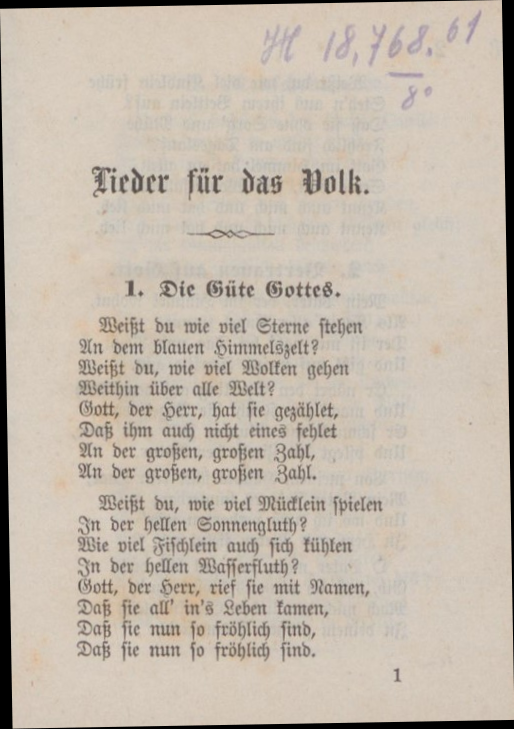

In [10]:
image_path = "../data/rotated_1.png"
im = Image.open(image_path)
im

In [21]:
img = cv2.imread("../data/rotated_1.png")

# HSV-Transform und Hue exrahieren
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue = hsv[:, :, 0]
hue_mask = cv2.inRange(hue, 135, 160)  # Hue für die Farbe lila

# 輪郭検出
contours, _ = cv2.findContours(hue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Bounding box finden
if contours:
    x_min = min([cv2.boundingRect(c)[0] for c in contours])
    y_min = min([cv2.boundingRect(c)[1] for c in contours])
    x_max = max([cv2.boundingRect(c)[0] + cv2.boundingRect(c)[2] for c in contours])
    y_max = max([cv2.boundingRect(c)[1] + cv2.boundingRect(c)[3] for c in contours])

    # Padding hinzufügen
    left_pad = 25
    other_pad = 10
    x1 = max(x_min - left_pad, 0)
    y1 = max(y_min - other_pad, 0)
    x2 = min(x_max + other_pad, img.shape[1])
    y2 = min(y_max + other_pad, img.shape[0])

    # Masking
    patch = img[y1:y2, x1:x2]
    bg_color = cv2.mean(patch)[:3]
    cv2.rectangle(img, (x1, y1), (x2, y2), bg_color, thickness=-1)

cv2.imwrite("../data/no_purple.png", img)

True

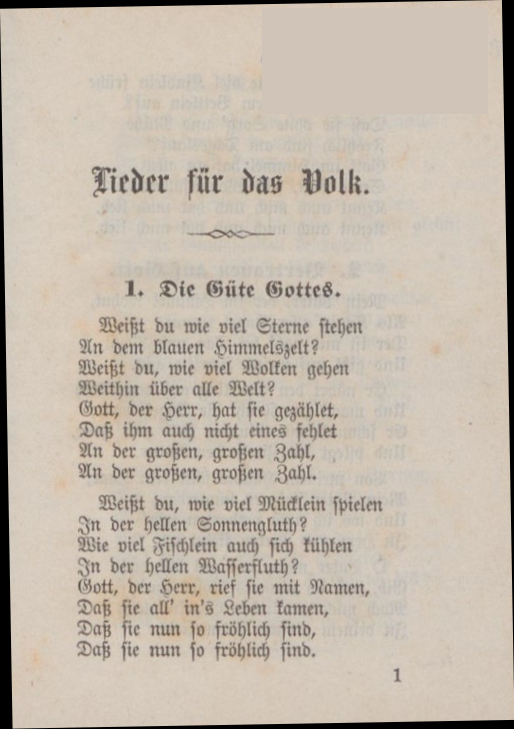

In [22]:
im = Image.open("../data/no_purple.png")
im

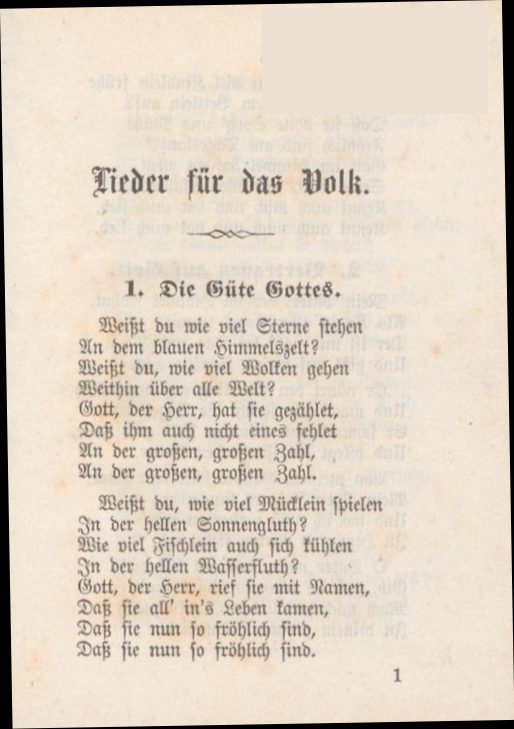

In [23]:
img = cv2.imread("../data/no_purple.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Normalisieren
img_norm = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
pil_img_norm = Image.fromarray(img_norm)
pil_img_norm



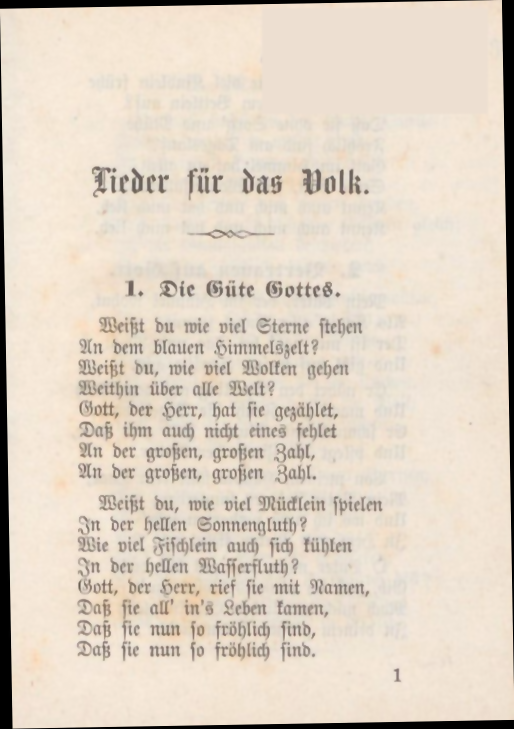

In [24]:
# Noise Entfernen
img_denoise = cv2.bilateralFilter(img_norm,5, 55,60)
pil_img_denoise = Image.fromarray(img_denoise)
pil_img_denoise


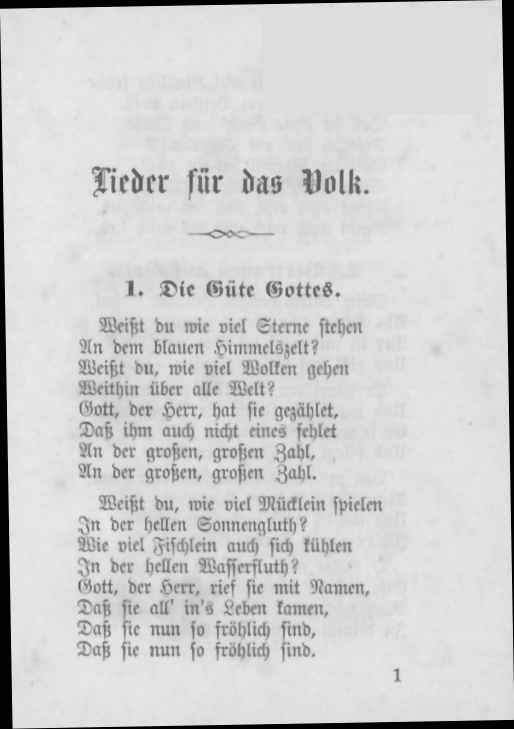

In [36]:

# Graustufen
img_gray = cv2.cvtColor(img_denoise, cv2.COLOR_BGR2GRAY)
cv2.imwrite("../data/gray.png", img_gray)
pil_img_gray = Image.fromarray(img_gray)
pil_img_gray



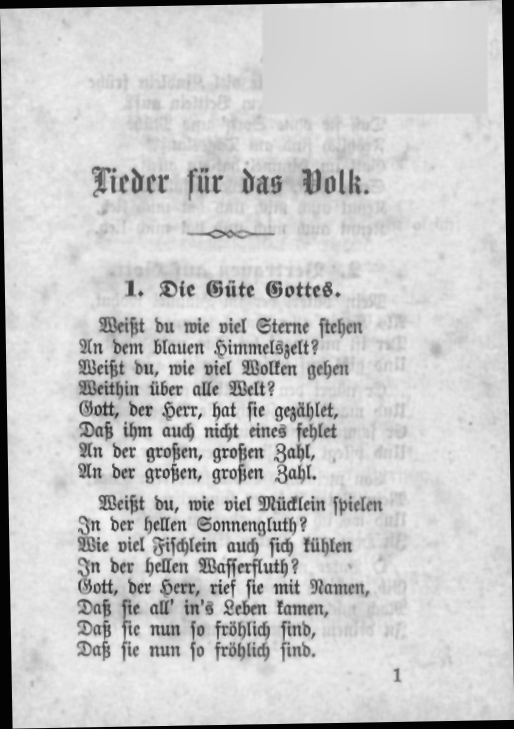

In [39]:
# Kontrast konfigurieren, damit die kleinen Zeichen deutlicher werden
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_enhanced = clahe.apply(img_gray)
cv2.imwrite("../data/gray_enhanced.png", gray_enhanced)
pil_img_gray_enhanced = Image.fromarray(gray_enhanced)
pil_img_gray_enhanced


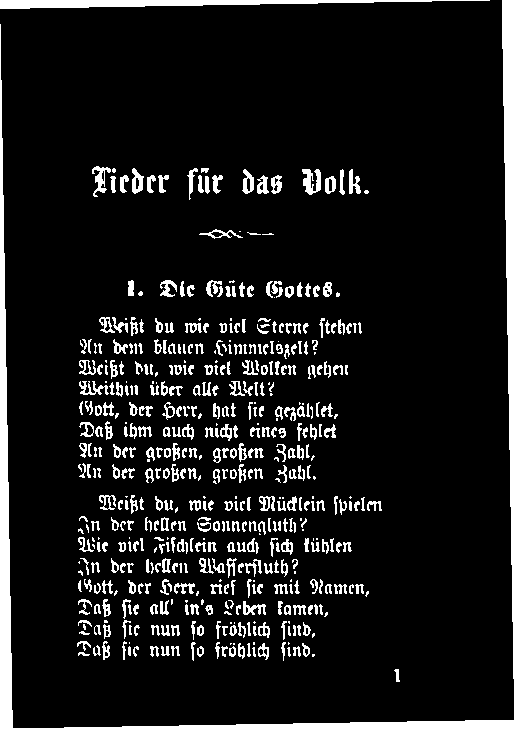

In [37]:
# Binalisieren
threshold_val = 170
_, img_bi = cv2.threshold(img_gray, threshold_val, 255, 1)
cv2.imwrite("../data/bi.png", img_bi)
pil_img_bi = Image.fromarray(img_bi)
pil_img_bi

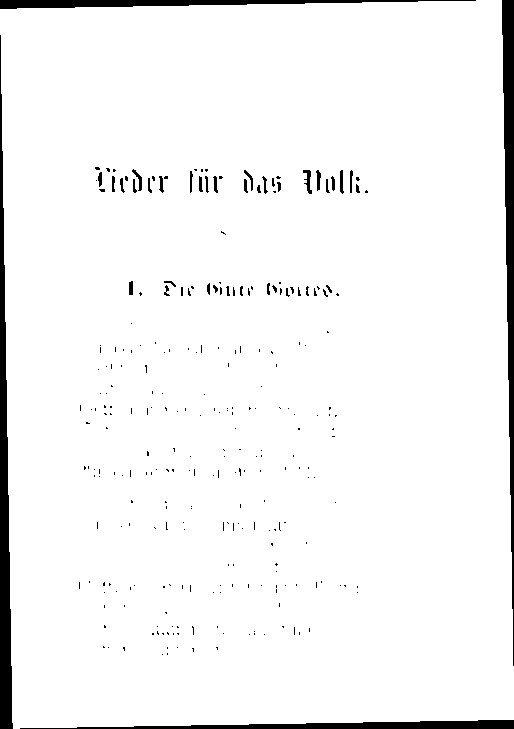

In [38]:
_, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
cv2.imwrite("../data/bi_otsu.png", img_otsu)
pil_img_otsu = Image.fromarray(img_otsu)
pil_img_otsu